In [1]:
from __future__ import absolute_import, division, print_function
from builtins import (
    ascii, bytes, chr, dict, filter, hex, input, int, map,
    next, oct, open, pow, range, round, str, super, zip)

import os
import json
import zipfile
from itertools import cycle
from copy import deepcopy
import colorsys
import random

import psycopg2
from shapely.geometry import shape, MultiPolygon
from shapely.ops import cascaded_union
from descartes import PolygonPatch
import fiona
import gdal
import osgeo
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from matplotlib.patches import Polygon
%matplotlib inline

In [2]:
psql_pass = os.environ['PSQL_PASS']

In [3]:
conn = psycopg2.connect(
    database='wisc_gerry',
    user='pmende',
    password=psql_pass,
    host='localhost'
)

In [7]:
cur = conn.cursor()

In [4]:
with fiona.open('data/districts/congressional/Wisconsin_Congressional_Districts.shp') as f:
    shapes = [shape(polygon['geometry']) for polygon in f]

In [87]:
congressional_patches = [PolygonPatch(shp) for shp in shapes]
N = 8
colors = [plb.cm.Dark2(x) for x in range(N)]
for patch, color in zip(congressional_patches, cycle(colors)):
    patch.set_facecolor(color)
    patch.set_linewidth(1.5)

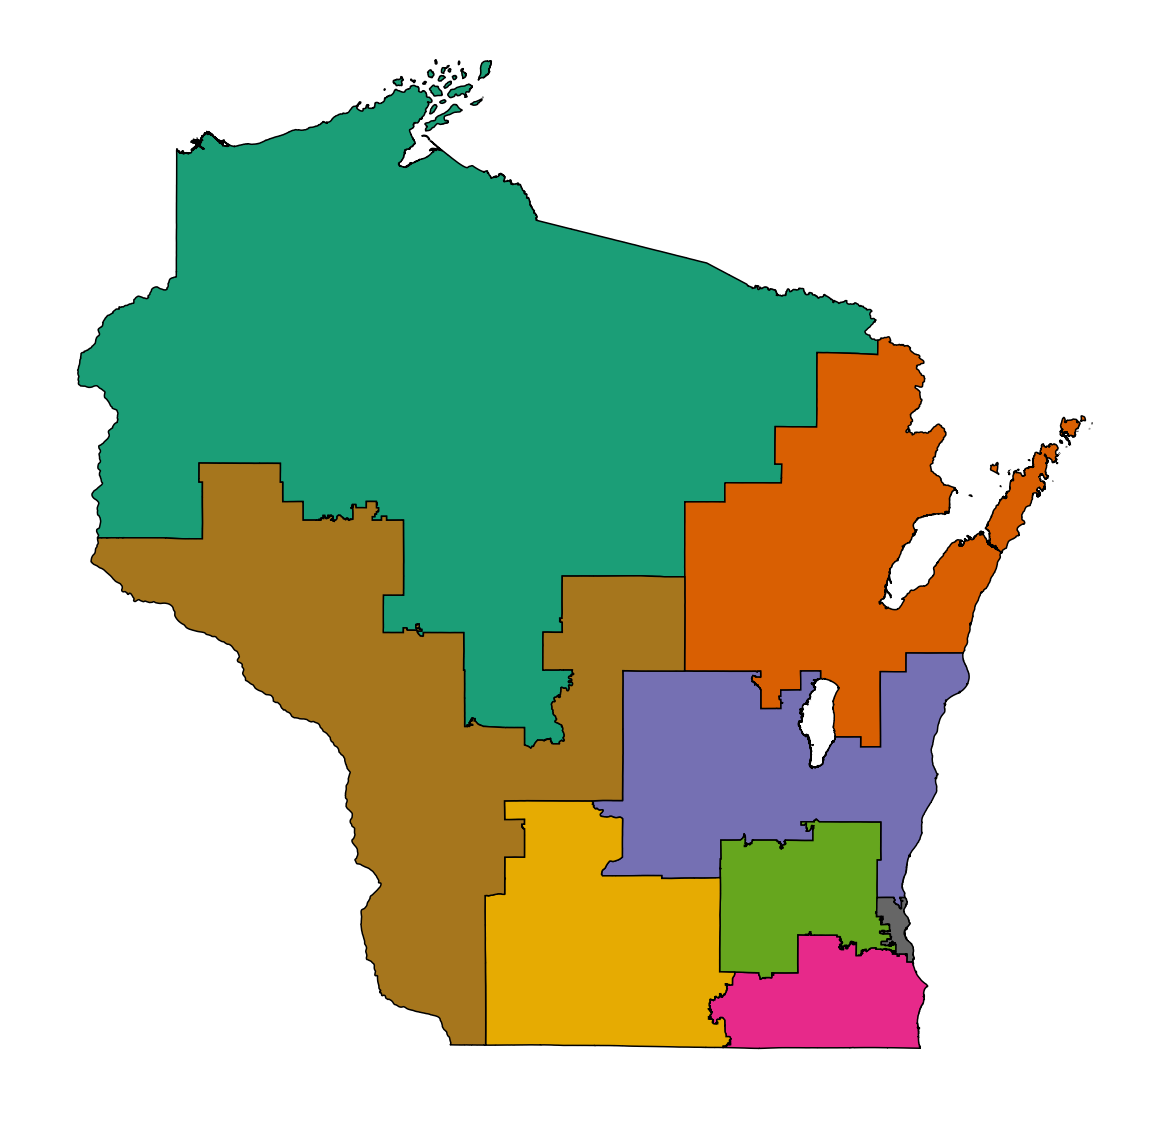

In [88]:
fig, ax = plt.subplots(figsize=(20,20))

for patch in congressional_patches:
    ax.add_patch(patch)
    
ax.relim()
ax.autoscale_view()
ax.axis('off');

In [89]:
fig.savefig('images/congressional_districts.png', bbox_inches='tight')

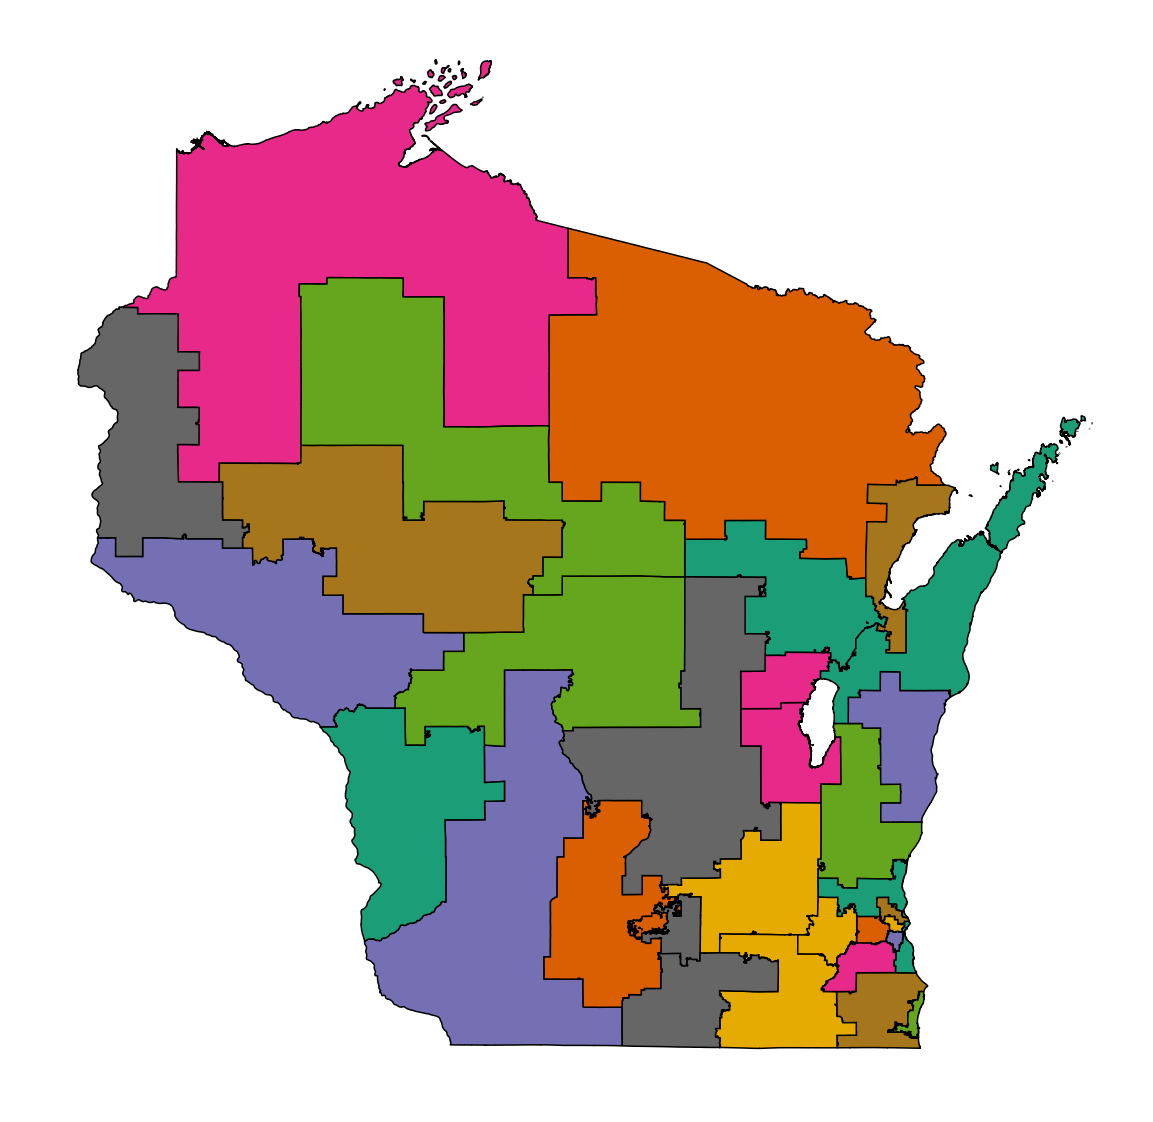

In [19]:
with fiona.open('data/districts/state_senate/Wisconsin_State_Senate_Districts.shp') as f:
    shapes = [shape(polygon['geometry']) for polygon in f]
    patches = [PolygonPatch(shp) for shp in shapes]

random.seed(38502)
random.shuffle(patches)
N = 8
colors = [plb.cm.Dark2(x) for x in range(N)]
for patch, color in zip(patches, cycle(colors)):
    patch.set_facecolor(color)
    patch.set_linewidth(1.5)

fig, ax = plt.subplots(figsize=(20,20))

for patch in patches:
    ax.add_patch(patch)
    
ax.relim()
ax.autoscale_view()
ax.axis('off');